In [1]:
import warnings
import tempfile
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import xml.etree.ElementTree as ET

from controller import SmartAPI
from IPython.display import display

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

### Step 1. Get the API   
In this case we are using metakg data and need to grab the metakg (`api.get_metakg()`) specifically once we get the api (`SmartAPI.get(mkg_id)`)

In [2]:
def metakg_request(mkg_id):
    """
    Get MetaKG API:
    Using the query input ID, get the metakg api
    """
    api = SmartAPI.get(mkg_id)
    mkg_api = api.get_metakg()
    return mkg_api


In [3]:
# for testing
query_id ="dc91716f44207d2e1287c727f281d339"
predicate = 'interacts_with'
write_file = False
edges = metakg_request(query_id)


In [4]:
edges[1] 

{'subject': 'SequenceVariant',
 'object': 'Gene',
 'predicate': 'is_non_coding_variant_of',
 'provided_by': None,
 'api': {'name': 'BioThings Explorer (BTE) TRAPI',
  'smartapi': {'metadata': 'https://raw.githubusercontent.com/NCATS-Tangerine/translator-api-registry/master/biothings_explorer/smartapi.yaml',
   'id': 'dc91716f44207d2e1287c727f281d339',
   'ui': 'https://smart-api.info/ui/dc91716f44207d2e1287c727f281d339'},
  'tags': ['1.3.0',
   'meta_knowledge_graph',
   'query',
   'asyncquery',
   'translator',
   'trapi',
   'biothings',
   'bte-trapi'],
  'x-translator': {'component': 'ARA', 'team': ['Exploring Agent']}},
 'bte': {'query_operation': {'path': '/query',
   'method': 'post',
   'server': 'https://bte.transltr.io/v1',
   'path_params': None,
   'params': None,
   'request_body': None,
   'support_batch': True,
   'input_separator': ','}}}

### Step 2: Build the graphml tree  



In [6]:
root = ET.Element('graphml')
root.set('xmlns', 'http://graphml.graphdrawing.org/xmlns')


In [7]:
graph = ET.SubElement(root, 'graph')
graph.set('id', 'G')
graph.set('edgedefault', 'directed')


In [8]:
for data in edges[:5]:
    # Create the node element
    node = ET.SubElement(graph, 'node')
    node.set('id', data['subject'])
    
    # Create the data element for the node
    data_node = ET.SubElement(node, 'data')
    data_node.set('key', 'd1')
    data_node.text = data['subject']
    
    # Create the edge element
    edge = ET.SubElement(graph, 'edge')
    edge.set('source', data['subject'])
    edge.set('target', data['object'])
    
    # Create the data element for the edge
    data_edge = ET.SubElement(edge, 'data')
    data_edge.set('key', 'd2')
    data_edge.text = data['predicate']

In [9]:
key_node = ET.SubElement(graph, 'key')
key_node.set('id', 'd1')
key_node.set('for', 'node')
key_node.set('attr.name', 'label')
key_node.set('attr.type', 'string')

key_edge = ET.SubElement(graph, 'key')
key_edge.set('id', 'd2')
key_edge.set('for', 'edge')
key_edge.set('attr.name', 'label')
key_edge.set('attr.type', 'string')


In [10]:
tree = ET.ElementTree(root)
tree.write('new_graph.graphml')  # Write to a file


In [19]:
root = ET.Element('graphml')
root.set('xmlns', 'http://graphml.graphdrawing.org/xmlns')

# Define key for node data
key_node = ET.SubElement(root, 'key')
key_node.set('id', 'd1')
key_node.set('for', 'node')
key_node.set('attr.name', 'label')
key_node.set('attr.type', 'string')

# Define key for edge data
key_edge = ET.SubElement(root, 'key')
key_edge.set('id', 'd2')
key_edge.set('for', 'edge')
key_edge.set('attr.name', 'label')
key_edge.set('attr.type', 'string')

graph = ET.SubElement(root, 'graph')
graph.set('id', 'G')
graph.set('edgedefault', 'directed')

for data in edges:
    node = ET.SubElement(graph, 'node')
    node.set('id', data['subject'])
    
    data_node = ET.SubElement(node, 'data')
    data_node.set('key', 'd1')
    data_node.text = data['subject']
    
    edge = ET.SubElement(graph, 'edge')
    edge.set('source', data['subject'])
    edge.set('target', data['object'])
    
    data_edge = ET.SubElement(edge, 'data')
    data_edge.set('key', 'd2')
    data_edge.text = data['predicate']

tree = ET.ElementTree(root)
tree.write('nu_graph.graphml')



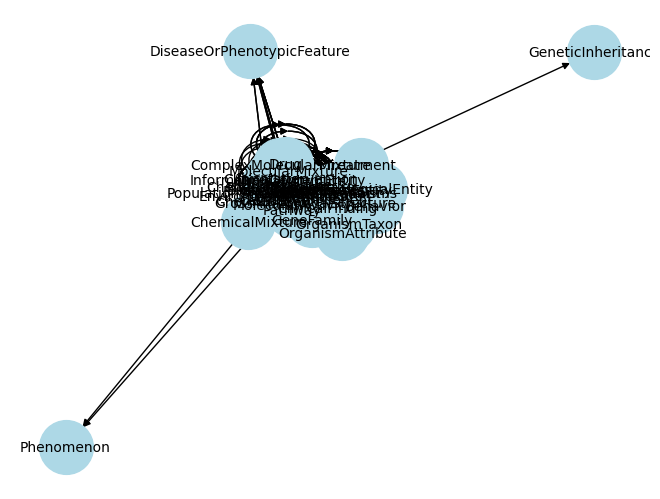

In [20]:


graph = nx.read_graphml('nu_graph.graphml')

nx.draw(graph, with_labels=True, node_color='lightblue', node_size=1500, font_size=10)
plt.show()

---

In [ ]:
def edges2graphml(edges, outfile=None):


In [ ]:
graphml_content = edges2graphml(edges)

In [ ]:
def test_graphml():
    query= 

In [10]:
# Create the root element
root = ET.Element("graphml")
root.set("xmlns", "http://graphml.graphdrawing.org/xmlns")
root.set("xmlns:xsi", "http://www.w3.org/2001/XMLSchema-instance")
root.set("xsi:schemaLocation", "http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd")

# Define the key element for the subject
key = ET.SubElement(root, "key", id="subject", for_="node", attr.name="subject", attr.type="string")

# Define the key element for the object
key = ET.SubElement(root, "key", id="object", for_="node", attr.name="object", attr.type="string")

# Define the key element for the predicate
key = ET.SubElement(root, "key", id="predicate", for_="edge", attr.name="predicate", attr.type="string")

# Create the graph element
graph = ET.SubElement(root, "graph", edgedefault="directed")


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1668204292.py, line 8)